In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from scavenger import criterion

np.random.seed(0) # Also sets seed for pandas
sns.set_theme(style="whitegrid")

# Get dataset lengths

In [4]:
from scavenger.reader import C4Reader, PileReader, DataSplit

c4_reader = C4Reader(data_root="/data/c4", data_split=DataSplit.VAL)
print("Length of C4 dataset:", len(c4_reader))

Length of C4 dataset: 364608


In [6]:
pile_reader = PileReader(data_root="/data/pile", data_split=DataSplit.VAL)
print("Length of Pile dataset:", len(pile_reader))

Length of Pile dataset: 214670


# The Pile

In [7]:
data_dir = "./output/pile"
data_path = Path(data_dir) / "table.csv"

In [8]:
df = pd.read_csv(str(data_path))
df.head(10)

,doc_id,AllDocuments,Domain,QuestionAnswerStrings,FullyStructured,ExamStrings,QuestionStrings,ExamplesStrings,NewlineOccurrence,preview
0,0,True,False,False,False,False,True,False,True,Catalonia election: Puigdemont calls for talks...
1,1,True,False,False,False,False,False,False,True,"Wirex, a prominent UK’s FCA supported cryptocu..."
2,2,True,False,False,False,False,False,False,False,"Effect of sleep quality on memory, executive f..."
3,3,True,False,False,False,False,False,False,True,"### Solution for ""Download of Code Without Int..."
4,4,True,False,False,False,False,False,False,False,Fluorescent labeling of both GABAergic and gly...
5,5,True,False,True,False,False,True,False,True,Q:How to avoid anti-clockwise rotation animati...
6,6,True,False,False,False,False,False,False,False,"Carotid endarterectomy: operative risks, recur..."
7,7,True,False,False,False,False,False,False,False,Regulation of the anaerobic metabolism in Baci...
8,8,True,False,True,False,False,True,False,True,Q:ReCAPTCHA v3 is not working in a Shopify Con...
9,9,True,False,False,False,False,False,False,False,Early and long-term outcomes after manual and ...


,criteria,counts
0,AllDocuments,214670.0
1,NewlineOccurrence,100685.0
2,QuestionStrings,40697.0
3,QuestionAnswerStrings,33190.0
4,FullyStructured,2388.0
5,ExamStrings,1842.0
6,ExamplesStrings,111.0
7,Domain,0.0


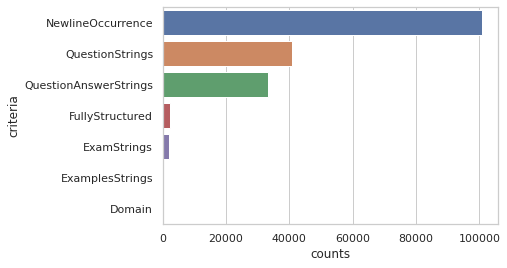

In [9]:
df_criteria = df.select_dtypes(include=bool)
# Get counts for each criterion
criteria_counts = df_criteria.apply(pd.value_counts).loc[True]
criteria_counts.fillna(0, inplace=True)
criteria_counts.sort_values(ascending=False, inplace=True)
df_counts = pd.DataFrame({
    "criteria": criteria_counts.index,
    "counts": criteria_counts.values,
})

display(df_counts)
ax = sns.barplot(x="counts", y="criteria", data=df_counts[df_counts.criteria != "AllDocuments"])

# C4

In [10]:
data_dir = "./output/c4"
data_path = Path(data_dir) / "table.csv"

In [11]:
df = pd.read_csv(str(data_path))
df.head(10)

,doc_id,AllDocuments,Domain,QuestionAnswerStrings,FullyStructured,ExamStrings,QuestionStrings,ExamplesStrings,NewlineOccurrence,preview
0,0,True,False,False,False,False,False,False,False,The woman who died after falling from a bridge...
1,1,True,False,False,False,False,True,False,False,messaging system designed as a plugin-based sy...
2,2,True,False,False,False,False,False,False,False,"CHARLES H. MEISNER, one of the prosperous and ..."
3,3,True,False,False,False,False,True,False,False,EVER WONDER WHY SOME PEOPLE CAN WORK NIGHTS AN...
4,4,True,False,False,False,False,False,False,False,Conduct effective product control and valuatio...
5,5,True,False,False,False,False,False,False,False,Stayed here about four years ago and they help...
6,6,True,False,False,False,False,True,False,False,"It’s the end of the world,” said the caterpill..."
7,7,True,False,False,False,False,False,False,False,"Fasnet 2015: Spindrift & Prince de Bretagne , ..."
8,8,True,False,False,False,False,False,False,False,As the nation’s largest no-reserve internet au...
9,9,True,False,False,False,False,False,False,False,Stretch Therapy (ST) is a comprehensive system...


,criteria,counts
0,AllDocuments,364608.0
1,QuestionStrings,56990.0
2,NewlineOccurrence,19263.0
3,QuestionAnswerStrings,3634.0
4,ExamStrings,2226.0
5,Domain,729.0
6,ExamplesStrings,170.0
7,FullyStructured,127.0


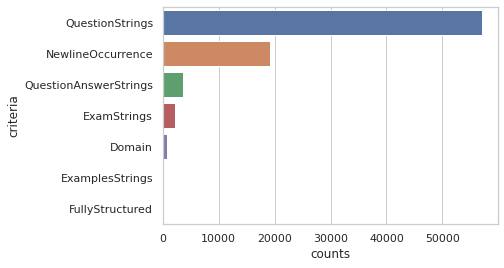

In [12]:
df_criteria = df.select_dtypes(include=bool)
# Get counts for each criterion
criteria_counts = df_criteria.apply(pd.value_counts).loc[True]
criteria_counts.fillna(0, inplace=True)
criteria_counts.sort_values(ascending=False, inplace=True)
df_counts = pd.DataFrame({
    "criteria": criteria_counts.index,
    "counts": criteria_counts.values,
})

display(df_counts)
ax = sns.barplot(x="counts", y="criteria", data=df_counts[df_counts.criteria != "AllDocuments"])